In [100]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt




import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import auc, roc_curve, classification_report, roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
from sklearn.neighbors import KNeighborsClassifier 
from heapq import nsmallest
from sklearn.naive_bayes import GaussianNB

In [102]:
df = pd.read_csv('smoking_data.csv', delimiter=';') 
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),"eyesight(left, right)","hearing(left, right)",systolic,relaxation,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
0,0,F,40.0,155.0,60.0,81.3,"1.2, 1.0","1.0, 1.0",114.0,73.0,...,126.0,12.9,1.0,0.7,18.0,19.0,27.0,N,Y,N
1,1,F,40.0,160.0,60.0,81.0,"0.8, 0.6","1.0, 1.0",119.0,70.0,...,127.0,12.7,1.0,0.6,22.0,19.0,18.0,N,Y,N
2,2,M,55.0,170.0,60.0,80.0,"0.8, 0.8","1.0, 1.0",138.0,86.0,...,151.0,15.8,1.0,1.0,21.0,16.0,22.0,N,N,Y
3,3,M,40.0,165.0,70.0,88.0,"1.5, 1.5","1.0, 1.0",100.0,60.0,...,226.0,14.7,1.0,1.0,19.0,26.0,18.0,N,Y,N
4,4,F,40.0,155.0,60.0,86.0,"1.0, 1.0","1.0, 1.0",120.0,74.0,...,107.0,12.5,1.0,0.6,16.0,14.0,22.0,N,N,N


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     55692 non-null  int64  
 1   gender                 50000 non-null  object 
 2   age                    50000 non-null  float64
 3   height(cm)             50000 non-null  float64
 4   weight(kg)             50000 non-null  float64
 5   waist(cm)              50000 non-null  float64
 6   eyesight(left, right)  50000 non-null  object 
 7   hearing(left, right)   50000 non-null  object 
 8   systolic               50000 non-null  float64
 9   relaxation             50000 non-null  float64
 10  fasting blood sugar    50000 non-null  float64
 11  Cholesterol            50000 non-null  float64
 12  triglyceride           50000 non-null  float64
 13  HDL                    50000 non-null  float64
 14  LDL                    50000 non-null  float64
 15  he

In [104]:
df.describe(include='all').T #подробная информация о атрибутах

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,55692.0,NaN,NaN,NaN,27845.5,16077.039933,0.0,13922.75,27845.5,41768.25,55691.0
gender,50000,2,M,31757,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,50000.0,NaN,NaN,NaN,44.2168,12.067415,20.0,40.0,40.0,55.0,85.0
height(cm),50000.0,NaN,NaN,NaN,164.6512,9.198099,130.0,160.0,165.0,170.0,190.0
weight(kg),50000.0,NaN,NaN,NaN,65.8805,12.804745,30.0,55.0,65.0,75.0,135.0
waist(cm),50000.0,NaN,NaN,NaN,82.047068,9.273562,51.0,76.0,82.0,88.0,129.0
"eyesight(left, right)",50000,207,"1.2, 1.2",5387,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"hearing(left, right)",50000,4,"1.0, 1.0",48092,NaN,NaN,NaN,NaN,NaN,NaN,NaN
systolic,50000.0,NaN,NaN,NaN,121.51252,13.697147,71.0,112.0,120.0,130.0,240.0
relaxation,50000.0,NaN,NaN,NaN,76.01452,9.67023,40.0,70.0,76.0,82.0,146.0


In [105]:
df.dtypes.value_counts() #вывод количества объектов

float64    17
object      6
int64       1
dtype: int64

In [106]:
del df["eyesight(left, right)"]
del df["hearing(left, right)"]

In [107]:
df.dtypes.value_counts() #вывод количества объектов

float64    17
object      4
int64       1
dtype: int64

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               50000 non-null  object 
 2   age                  50000 non-null  float64
 3   height(cm)           50000 non-null  float64
 4   weight(kg)           50000 non-null  float64
 5   waist(cm)            50000 non-null  float64
 6   systolic             50000 non-null  float64
 7   relaxation           50000 non-null  float64
 8   fasting blood sugar  50000 non-null  float64
 9   Cholesterol          50000 non-null  float64
 10  triglyceride         50000 non-null  float64
 11  HDL                  50000 non-null  float64
 12  LDL                  50000 non-null  float64
 13  hemoglobin           50000 non-null  float64
 14  Urine protein        50000 non-null  float64
 15  serum creatinine     50000 non-null 

In [109]:

df.dropna()

,ID,gender,age,height(cm),weight(kg),waist(cm),systolic,relaxation,fasting blood sugar,Cholesterol,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
2,2,M,55.0,170.0,60.0,80.0,138.0,86.0,89.0,242.0,...,151.0,15.8,1.0,1.0,21.0,16.0,22.0,N,N,Y
3,3,M,40.0,165.0,70.0,88.0,100.0,60.0,96.0,322.0,...,226.0,14.7,1.0,1.0,19.0,26.0,18.0,N,Y,N
4,4,F,40.0,155.0,60.0,86.0,120.0,74.0,80.0,184.0,...,107.0,12.5,1.0,0.6,16.0,14.0,22.0,N,N,N
7,7,M,45.0,165.0,90.0,96.0,153.0,96.0,158.0,222.0,...,134.0,15.0,1.0,1.3,38.0,71.0,111.0,N,Y,N
11,12,M,30.0,170.0,75.0,87.0,124.0,78.0,101.0,184.0,...,106.0,17.9,1.0,1.1,34.0,69.0,64.0,N,Y,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55628,55366,F,55.0,155.0,55.0,77.0,130.0,72.0,86.0,300.0,...,190.0,13.6,1.0,0.6,31.0,30.0,20.0,N,Y,N
55644,55442,F,50.0,160.0,60.0,82.0,118.0,78.0,94.0,189.0,...,91.0,13.9,1.0,0.8,27.0,19.0,30.0,N,N,N
55660,55481,F,60.0,160.0,65.0,85.0,142.0,91.0,116.0,187.0,...,118.0,12.4,1.0,0.6,31.0,39.0,19.0,N,N,N
55666,55553,M,25.0,170.0,80.0,90.0,130.0,79.0,86.0,194.0,...,132.0,15.6,1.0,0.9,20.0,25.0,21.0,N,N,N


In [110]:
print(df.dropna().shape)

(6482, 22)


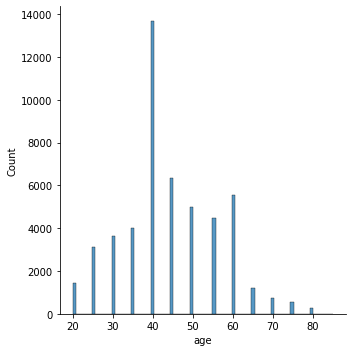

In [111]:
distplot = sns.displot(df.age)

In [112]:
df.dtypes

ID                       int64
gender                  object
age                    float64
height(cm)             float64
weight(kg)             float64
waist(cm)              float64
systolic               float64
relaxation             float64
fasting blood sugar    float64
Cholesterol            float64
triglyceride           float64
HDL                    float64
LDL                    float64
hemoglobin             float64
Urine protein          float64
serum creatinine       float64
AST                    float64
ALT                    float64
Gtp                    float64
dental caries           object
tartar                  object
smoking                 object
dtype: object

In [113]:
"""df['gender'] = df['gender'].astype('category')
df['gender_'] = df['gender'].cat.codes

df['dental caries'] = df['dental caries'].astype('category')
df['dental caries_'] = df['dental caries'].cat.codes

df['tartar'] = df['tartar'].astype('category')
df['tartar_'] = df['tartar'].cat.codes

df['smoking'] = df['smoking'].astype('category')
df['smoking_'] = df['smoking'].cat.codes

del df['gender']
del df['dental caries']
del df['tartar']
del df['smoking']"""
del df['ID']#бессмысленныйф признак
column_names = df.select_dtypes(include=[np.number]).columns
df['gender'] = df['gender'].astype(bool)

column_names = df.select_dtypes(include=[np.number]).columns
df['dental caries'] = df['dental caries'].astype(bool)

column_names = df.select_dtypes(include=[np.number]).columns
df['tartar'] = df['tartar'].astype(bool)

column_names = df.select_dtypes(include=[np.number]).columns
df['smoking'] = df['smoking'].astype(bool)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55692 non-null  bool   
 1   age                  50000 non-null  float64
 2   height(cm)           50000 non-null  float64
 3   weight(kg)           50000 non-null  float64
 4   waist(cm)            50000 non-null  float64
 5   systolic             50000 non-null  float64
 6   relaxation           50000 non-null  float64
 7   fasting blood sugar  50000 non-null  float64
 8   Cholesterol          50000 non-null  float64
 9   triglyceride         50000 non-null  float64
 10  HDL                  50000 non-null  float64
 11  LDL                  50000 non-null  float64
 12  hemoglobin           50000 non-null  float64
 13  Urine protein        50000 non-null  float64
 14  serum creatinine     50000 non-null  float64
 15  AST                  50000 non-null 

In [115]:
# удалим аномалии из даннх, на основании вывода команды describe

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55692 non-null  bool   
 1   age                  50000 non-null  float64
 2   height(cm)           50000 non-null  float64
 3   weight(kg)           50000 non-null  float64
 4   waist(cm)            50000 non-null  float64
 5   systolic             50000 non-null  float64
 6   relaxation           50000 non-null  float64
 7   fasting blood sugar  50000 non-null  float64
 8   Cholesterol          50000 non-null  float64
 9   triglyceride         50000 non-null  float64
 10  HDL                  50000 non-null  float64
 11  LDL                  50000 non-null  float64
 12  hemoglobin           50000 non-null  float64
 13  Urine protein        50000 non-null  float64
 14  serum creatinine     50000 non-null  float64
 15  AST                  50000 non-null 

In [125]:
df.dropna()

,gender,age,height(cm),weight(kg),waist(cm),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
2,True,55.0,170.0,60.0,80.0,138.0,86.0,89.0,242.0,182.0,...,151.0,15.8,1.0,1.0,21.0,16.0,22.0,True,True,True
3,True,40.0,165.0,70.0,88.0,100.0,60.0,96.0,322.0,254.0,...,226.0,14.7,1.0,1.0,19.0,26.0,18.0,True,True,True
4,True,40.0,155.0,60.0,86.0,120.0,74.0,80.0,184.0,74.0,...,107.0,12.5,1.0,0.6,16.0,14.0,22.0,True,True,True
7,True,45.0,165.0,90.0,96.0,153.0,96.0,158.0,222.0,269.0,...,134.0,15.0,1.0,1.3,38.0,71.0,111.0,True,True,True
11,True,30.0,170.0,75.0,87.0,124.0,78.0,101.0,184.0,197.0,...,106.0,17.9,1.0,1.1,34.0,69.0,64.0,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55644,True,50.0,160.0,60.0,82.0,118.0,78.0,94.0,189.0,43.0,...,91.0,13.9,1.0,0.8,27.0,19.0,30.0,True,True,True
55660,True,60.0,160.0,65.0,85.0,142.0,91.0,116.0,187.0,87.0,...,118.0,12.4,1.0,0.6,31.0,39.0,19.0,True,True,True
55666,True,25.0,170.0,80.0,90.0,130.0,79.0,86.0,194.0,144.0,...,132.0,15.6,1.0,0.9,20.0,25.0,21.0,True,True,True
55670,True,50.0,175.0,75.0,91.0,126.0,84.0,115.0,250.0,206.0,...,158.0,15.3,1.0,1.1,23.0,19.0,19.0,True,True,True


In [129]:
#ghbpyfrb pfyxbvws

In [126]:
print(df.dropna().shape)

(8905, 21)


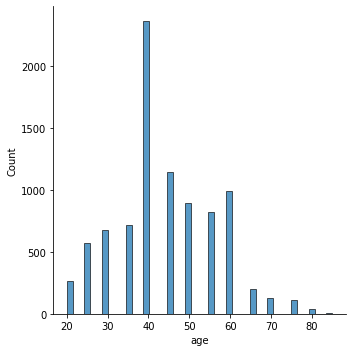

In [127]:
distplot = sns.displot(df.age)

In [117]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 4].values

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
#разделение на тестовую и тренировочную выборки 70+30=100
#этот принцип разделения используется, поскуольку входной массив данных достаточно велик, 
#чтобы не стеснять в "отщипнуть" немного значений в пользу тестовой части и быть более уверенным в результатах тестирования,
#кроме того такая пропорция разеделения данных между тестовой и обучающейся частью проверенна годами практики и считаетвся классической

In [119]:
scaler = StandardScaler()#стандартизация данных
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train

array([[ 0.00000000e+00, -3.47700087e-01,             nan, ...,
         1.00559685e-01,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,             nan,  1.12776410e+00, ...,
        -1.77753932e-01,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -3.47700087e-01,  1.12776410e+00, ...,
        -4.95826636e-01,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00, -3.47700087e-01,  1.12776410e+00, ...,
        -3.36790284e-01,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.31264698e+00, -1.04756547e+00, ...,
        -5.75344813e-01,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.31264698e+00, -1.04756547e+00, ...,
         1.16196495e-03,  0.00000000e+00,  0.00000000e+00]])

In [120]:
#KNN

Выяснить соответствующее метрику расстояния для расчета расстояния между точками

Сохранить расстояние в массиве и рассортировать его

Выберите первые элементы K в отсортированном списке

Выполните голосование большинства, и класс с максимальным количеством вхождений будет назначен в качестве нового класса точки данных для классификации.

In [121]:
def clean_dataset(df):#оичстка от пропусков
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

clean_dataset(df)

,gender,age,height(cm),weight(kg),waist(cm),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
2,1.0,55.0,170.0,60.0,80.0,138.0,86.0,89.0,242.0,182.0,...,151.0,15.8,1.0,1.0,21.0,16.0,22.0,1.0,1.0,1.0
3,1.0,40.0,165.0,70.0,88.0,100.0,60.0,96.0,322.0,254.0,...,226.0,14.7,1.0,1.0,19.0,26.0,18.0,1.0,1.0,1.0
4,1.0,40.0,155.0,60.0,86.0,120.0,74.0,80.0,184.0,74.0,...,107.0,12.5,1.0,0.6,16.0,14.0,22.0,1.0,1.0,1.0
7,1.0,45.0,165.0,90.0,96.0,153.0,96.0,158.0,222.0,269.0,...,134.0,15.0,1.0,1.3,38.0,71.0,111.0,1.0,1.0,1.0
11,1.0,30.0,170.0,75.0,87.0,124.0,78.0,101.0,184.0,197.0,...,106.0,17.9,1.0,1.1,34.0,69.0,64.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55644,1.0,50.0,160.0,60.0,82.0,118.0,78.0,94.0,189.0,43.0,...,91.0,13.9,1.0,0.8,27.0,19.0,30.0,1.0,1.0,1.0
55660,1.0,60.0,160.0,65.0,85.0,142.0,91.0,116.0,187.0,87.0,...,118.0,12.4,1.0,0.6,31.0,39.0,19.0,1.0,1.0,1.0
55666,1.0,25.0,170.0,80.0,90.0,130.0,79.0,86.0,194.0,144.0,...,132.0,15.6,1.0,0.9,20.0,25.0,21.0,1.0,1.0,1.0
55670,1.0,50.0,175.0,75.0,91.0,126.0,84.0,115.0,250.0,206.0,...,158.0,15.3,1.0,1.1,23.0,19.0,19.0,1.0,1.0,1.0


In [122]:
df.isnull().any().any()#проверка на пропуски

False

In [123]:
df.isnull().any()

gender                 False
age                    False
height(cm)             False
weight(kg)             False
waist(cm)              False
systolic               False
relaxation             False
fasting blood sugar    False
Cholesterol            False
triglyceride           False
HDL                    False
LDL                    False
hemoglobin             False
Urine protein          False
serum creatinine       False
AST                    False
ALT                    False
Gtp                    False
dental caries          False
tartar                 False
smoking                False
dtype: bool

In [124]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

ValueError: ignored

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix # предоставление показателей точности работы модели 
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
#DTC (Классификатор дерева решений)

Этот классификатор разбивает данные на всё меньшие и меньшие подмножества на основе разных критериев, т. е. у каждого подмножества своя сортирующая категория. С каждым разделением количество объектов определённого критерия уменьшается.

Классификация подойдёт к концу, когда сеть дойдёт до подмножества только с одним объектом. Если объединить несколько подобных деревьев решений, то получится так называемый Случайный Лес

In [ ]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)# предоставление показателей точности работы модели 
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
#Наивный Байес

Такой классификатор вычисляет вероятность принадлежности объекта к какому-то классу. Эта вероятность вычисляется из шанса, что какое-то событие произойдёт, с опорой на уже на произошедшие события.

Каждый параметр классифицируемого объекта считается независимым от других параметров.

In [ ]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)# предоставление показателей точности работы модели 
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
#Метод опорных векторов

Работа метода опорных векторов заключается в рисовании линии между разными кластерами точек, которые нужно сгруппировать в классы. С одной стороны линии будут точки, принадлежащие одному классу, с другой стороны — к другому классу.

Классификатор будет пытаться увеличить расстояние между рисуемыми линиями и точками на разных сторонах, чтобы увеличить свою «уверенность» определения класса. Когда все точки построены, сторона, на которую они падают — это класс, которому эти точки принадлежат.

In [ ]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)# предоставление показателей точности работы модели 
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
# Логистическая регрессия

Функция проводит количественную оценку вероятности того, что точка обучающей выборки классифицируется моделью правильным образом. Поэтому, среднее значение для всей обучающей выборки показывает вероятность того, что случайная точка данных будет корректно классифицирована системой, независимо от возможного класса.

Механизм обучения логистической регрессии старается максимизировать среднее значение 

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)# предоставление показателей точности работы модели 
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Необходимо выбрать модель классификации данных о пациентах по наличию зависимости от табакокурения, обосновать выбор модели. Необходимо обучить модель на обучающей выборке и протестировать. Необходимо предоставить показатели точности работы выбранной модели и всех рассматриваемых.

Я выбрал классификационную модель "" поскольку полнота нахождения точности данных в медицинских исследованиях гораздо важнее, чем точность вывода данных: лучше провести дополнительные обследования пациэнтам с ложноположительным результатом, чем упустить ложноотрицательных пациэнтов, поскольку последний случай несёт долгосрочные риски (может привести к усугублению заболевания (зависимости от курения и еёпоследствий))